In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional


In [2]:
df = pd.read_csv('stock.csv')

In [3]:
df.head(5)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [4]:
print(df.shape)


(1009, 7)


In [5]:
df.describe()


,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [7]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
df = df[['Date','Open','Close']]
df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: x.split()[0]))
df.set_index('Date',drop=True,inplace=True)
df.head(5)

,Open,Close
Date,,
2018-02-05,262.000000,254.259995
2018-02-06,247.699997,265.720001
2018-02-07,266.579987,264.559998
2018-02-08,267.079987,250.100006
2018-02-09,253.850006,249.470001


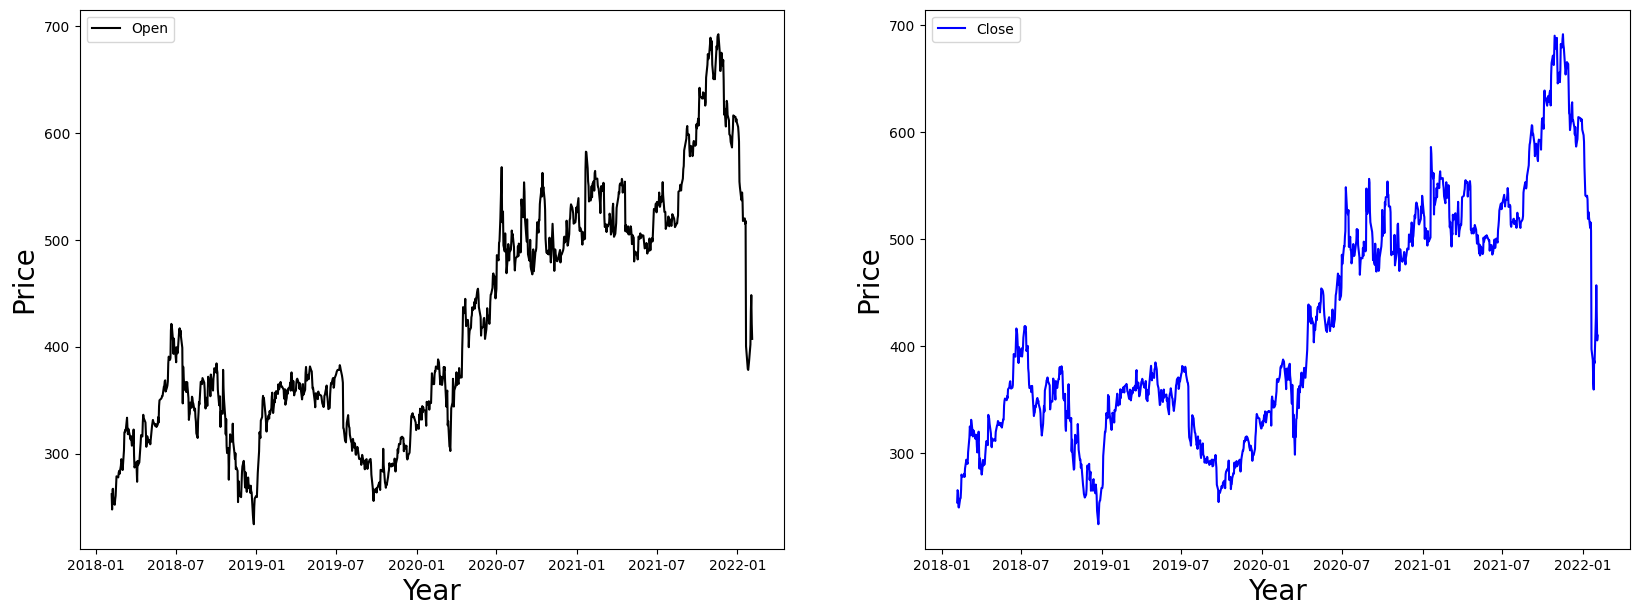

In [9]:
fig, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['Open'],label='Open',color='black')
ax[0].set_xlabel('Year',size=20)
ax[0].set_ylabel('Price',size=20)
ax[0].legend()
ax[1].plot(df['Close'],label='Close',color='blue')
ax[1].set_xlabel('Year',size=20)
ax[1].set_ylabel('Price',size=20)
ax[1].legend()
fig.show()

In [10]:
MMS = MinMaxScaler()
df[df.columns] = MMS.fit_transform(df)
df.head(10)

,Open,Close
Date,,
2018-02-05,0.061253,0.044516
2018-02-06,0.030059,0.069548
2018-02-07,0.071243,0.067015
2018-02-08,0.072334,0.035430
2018-02-09,0.043474,0.034053
2018-02-12,0.039744,0.052576
2018-02-13,0.050978,0.053275
2018-02-14,0.057915,0.070160
2018-02-15,0.078769,0.101330


In [11]:
training_size = round(len(df) * 0.75)
training_size


757

In [12]:
train_data = df[:training_size]
test_data = df[training_size:]
train_data.shape, test_data.shape

((757, 2), (252, 2))

In [14]:
def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)):
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))


In [15]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((707, 50, 2), (707, 2), (202, 50, 2), (202, 2))

In [19]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.
  shape[1], train_seq.shape[2])))

model.add(Dropout(0.1))
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam',
  metrics=['mean_absolute_error'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10600     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 30902 (120.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq,
 test_label), verbose=1)


Epoch 1/100
23/23 [==============================] - 6s 84ms/step - loss: 0.0242 - mean_absolute_error: 0.1085 - val_loss: 0.0331 - val_mean_absolute_error: 0.1495
Epoch 2/100
23/23 [==============================] - 1s 47ms/step - loss: 0.0033 - mean_absolute_error: 0.0442 - val_loss: 0.0085 - val_mean_absolute_error: 0.0704
Epoch 3/100
23/23 [==============================] - 2s 75ms/step - loss: 0.0022 - mean_absolute_error: 0.0347 - val_loss: 0.0052 - val_mean_absolute_error: 0.0489
Epoch 4/100
23/23 [==============================] - 2s 75ms/step - loss: 0.0019 - mean_absolute_error: 0.0325 - val_loss: 0.0049 - val_mean_absolute_error: 0.0477
Epoch 5/100
23/23 [==============================] - 1s 58ms/step - loss: 0.0019 - mean_absolute_error: 0.0325 - val_loss: 0.0047 - val_mean_absolute_error: 0.0464
Epoch 6/100
23/23 [==============================] - 1s 50ms/step - loss: 0.0020 - mean_absolute_error: 0.0332 - val_loss: 0.0045 - val_mean_absolute_error: 0.0460
Epoch 7/100
23/2

In [24]:
 test_predicted = model.predict(test_seq)
test_predicted[:5]


7/7 [==============================] - 1s 12ms/step


array([[0.68858534, 0.6895448 ],
       [0.59193224, 0.60159916],
       [0.60460365, 0.61280215],
       [0.59927785, 0.60692984],
       [0.6085472 , 0.61482286]], dtype=float32)

In [25]:
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[549.58813, 549.56055],
       [505.27945, 509.2981 ],
       [511.08844, 514.42694],
       [508.64694, 511.73853],
       [512.8963 , 515.35205]], dtype=float32)

In [27]:
df_merge = pd.concat([df.iloc[-202:].copy(),
                          pd.
  DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],
                                       index=df.iloc[-202:].index)], axis=1)


In [28]:
df_merge[['Open','Close']] = MMS.inverse_transform(df_merge[['Open','Close']])
df_merge.head()


,Open,Close,open_predicted,close_predicted
Date,,,,
2021-04-21,508.000000,508.899994,549.588135,549.560547
2021-04-22,513.820007,508.779999,505.279449,509.298096
2021-04-23,509.010010,505.549988,511.088440,514.426941
2021-04-26,506.760010,510.299988,508.646942,511.738525
2021-04-27,512.619995,505.549988,512.896301,515.352051


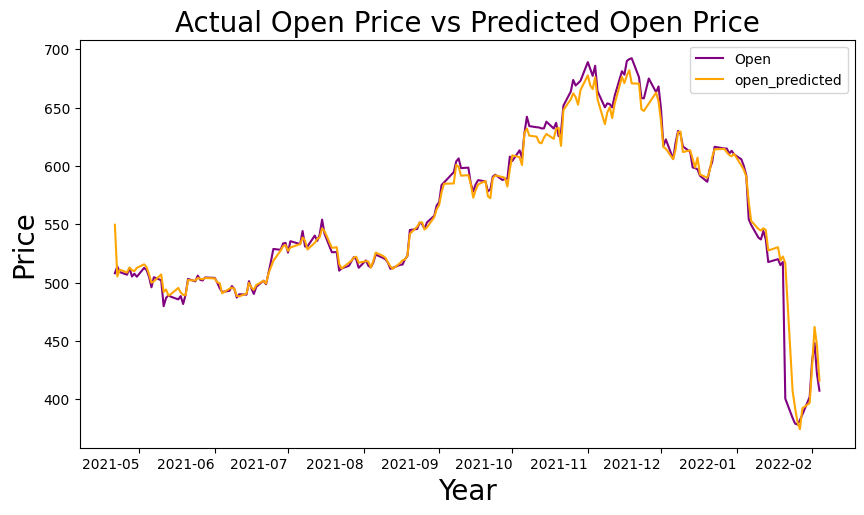

In [36]:
df_merge[['Open','open_predicted']].plot(figsize=(10,6),color=['purple','orange'])
plt.xticks(rotation=0)
plt.xlabel('Year',size=20)
plt.ylabel('Price',size=20)
plt.title('Actual Open Price vs Predicted Open Price',size=20)
plt.show()


In [38]:
df_merge = df_merge.append(pd.DataFrame(columns=df_merge.columns,
                                        index=pd.date_range(start=df_merge.
   index[-1], periods=11, freq='D', closed='right')))
df_merge['2021-06-09':'2021-06-16']

,Open,Close,open_predicted,close_predicted
2021-06-09,494.500000,485.809998,494.654144,496.733795
2021-06-10,487.170013,487.269989,488.552246,491.092957
2021-06-11,490.000000,488.769989,488.203461,490.696045
2021-06-14,489.679993,499.890015,490.561584,492.765564
2021-06-15,501.230011,491.899994,499.751251,501.180481
2021-06-16,495.000000,492.410004,495.750885,497.557434


In [39]:
upcoming_prediction = pd.DataFrame(columns=['Open','Close'],index=df_merge.
 index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [40]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
 up_pred = model.predict(curr_seq)
 upcoming_prediction.iloc[i] = up_pred
 curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
 curr_seq = curr_seq.reshape(test_seq[-1:].shape)


1/1 [==============================] - 0s 28ms/step


In [42]:
upcoming_prediction[['Open','Close']] = MMS.inverse_transform(upcoming_prediction[['Open','Close']])

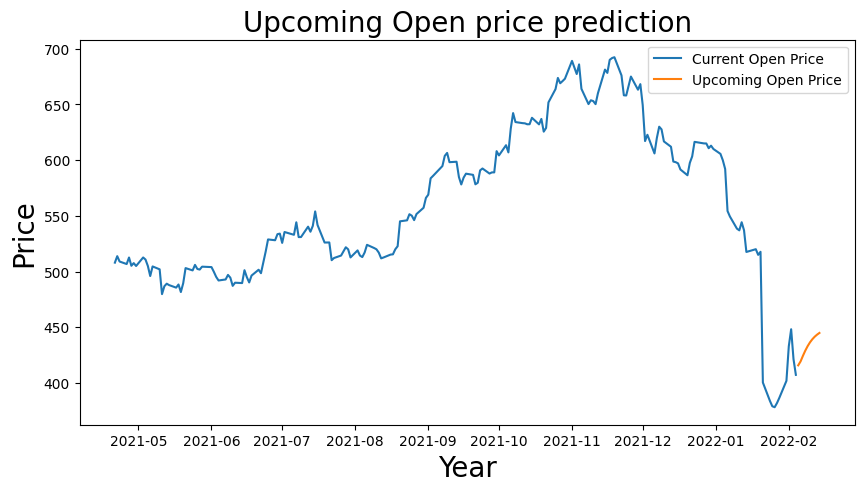

In [43]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2021-04-01':,'Open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'Open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
ax.set_xlabel('Year',size=20)
ax.set_ylabel('Price',size=20)
ax.set_title('Upcoming Open price prediction',size=20)
ax.legend()
fig.show()

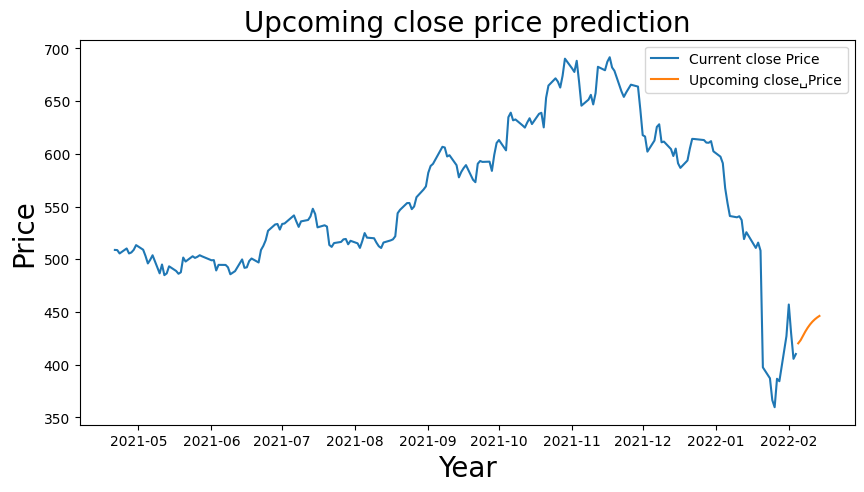

In [44]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2021-04-01':,'Close'],label='Current close Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'Close'],label='Upcoming close␣Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
ax.set_xlabel('Year',size=20)
ax.set_ylabel('Price',size=20)
ax.set_title('Upcoming close price prediction',size=20)
ax.legend()
fig.show()